In [58]:
import pandas as pd
import numpy as np
np.random.seed(11019038)

raw_data=pd.read_excel('type2補值資料final_(張).xlsx', header= 0)

In [59]:
raw_data.columns

Index(['Chart No.', 'Others', 'autotransplant', 'Type', 'Re-op', 'PrePTH',
       'Post1wPTH', 'Age', 'Sex', 'Ht', 'BW', 'BMI', 'ESRD yrs', 'HD or CAPD',
       'Bone pain', 'itching', 'weakness', 'calciphylaxis', 'DM', 'HTN',
       'PreCa', 'PreP', 'PreALK', 'PreHb', 'Post1wCa', 'OP method',
       'Thymectomy', 'thyroidectomy', 'OP time', 'blood loss', 'ParaLU size',
       'ParaLU Wt', 'Para LL size', 'ParaLL Wt', 'ParaRU size', 'Para RU Wt',
       'ParaRL size', 'ParaRL Wt', 'operation_success', 'HBS', 'OP METHOD'],
      dtype='object')

In [60]:
column_name=['Age', 'Sex', 'BMI','PrePTH', 'PreCa', 'PreP', 'PreALK', 'PreHb'] 
target1= 'Post1wPTH' #手術後一周內iPTH回到正常值 (≤ 65ng/L)
target2= 'Post1wCa' # 手術後一周內Ca低於8.4mg/dL
raw_data

,Chart No.,Others,autotransplant,Type,Re-op,PrePTH,Post1wPTH,Age,Sex,Ht,...,ParaLU Wt,Para LL size,ParaLL Wt,ParaRU size,Para RU Wt,ParaRL size,ParaRL Wt,operation_success,HBS,OP METHOD
0,9402555,".secondary hyperparathyroidism, post Total par...",1,2,0,910.0,293.00,69,2,158.7,...,0.130000,1.2,0.510000,0.4,0.070000,3.000000,5.010000,0.0,0.0,0
1,6050929,".secondary hyperparathyroidism, post Total par...",1,2,0,1072.0,1.50,60,1,166.2,...,0.310000,2.5,0.600000,2.0,2.140000,1.600000,0.830000,1.0,1.0,0
2,6872869,". Secondary hyperparathyoidism, s/p total para...",1,2,0,1600.0,10.50,69,2,154.8,...,0.570000,0.6,0.190000,2.5,2.180000,1.400000,0.390000,1.0,1.0,0
3,60478606,"Right papillary thyoid carcinoma, s/p right t...",1,2,0,1023.0,7.31,42,1,160,...,1.350000,1.5,1.070000,1.0,0.210000,1.434106,0.773247,1.0,0.0,0
4,60426530,. Hypocalcemia\n. Severe secondary hyperparath...,1,2,0,1726.0,45.10,42,2,151.4,...,0.520000,1.1,0.200000,1.5,0.360000,1.500000,0.570000,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,9411488,secondary hyperparathyroidism,2,2,1,428.0,718.00,40,1,182,...,2.190000,1.2,0.320000,1.9,1.600000,1.300000,0.300000,0.0,0.0,1
1074,1208905,.acute dystonia movement (chorea-like) R/O ben...,2,2,0,1355.0,53.90,70,2,150,...,1.198126,2.0,0.956473,1.3,1.209979,1.800000,0.912142,1.0,NaN,0
1075,9038813,secondary hyperparathyroidism,2,2,1,2546.0,6.96,61,2,144,...,1.494729,1.0,1.360127,1.4,1.454569,0.500000,1.211156,1.0,1.0,1
1076,6854564,1. Secondary hyperparathyroidism\n2. ESRD\n3. ...,2,2,0,1034.0,313.00,47,2,149,...,1.110995,0.5,0.824812,0.4,1.024370,0.500000,0.889249,0.0,NaN,0


In [61]:
missing_values = raw_data[column_name + [target1, target2]].isnull().sum()
print(missing_values)

Age            0
Sex            0
BMI           10
PrePTH        57
PreCa         68
PreP          84
PreALK       141
PreHb         41
Post1wPTH     40
Post1wCa     135
dtype: int64


In [62]:
missing_values = raw_data[column_name + [target1, target2]].isnull().sum()/len(raw_data)
print(missing_values)

Age          0.000000
Sex          0.000000
BMI          0.009276
PrePTH       0.052876
PreCa        0.063080
PreP         0.077922
PreALK       0.130798
PreHb        0.038033
Post1wPTH    0.037106
Post1wCa     0.125232
dtype: float64


In [28]:
raw_data.dropna(subset= 'PrePTH')[column_name + [target1, target2]].isnull().sum()/len(raw_data)*100

Age           0.000000
Sex           0.000000
BMI           0.834879
PrePTH        0.000000
PreCa         4.267161
PreP          5.658627
PreALK       11.317254
PreHb         3.710575
Post1wPTH     3.061224
Post1wCa     12.523191
dtype: float64

In [29]:
raw_data = raw_data.dropna(subset= 'PrePTH')

In [30]:
for col in column_name + [target1, target2]:
    raw_data[col] = pd.to_numeric(raw_data[col], errors='coerce')

print(raw_data[column_name + [target1, target2]].dtypes)

Age            int64
Sex            int64
BMI          float64
PrePTH       float64
PreCa        float64
PreP         float64
PreALK       float64
PreHb        float64
Post1wPTH    float64
Post1wCa     float64
dtype: object


C:\Users\longy\AppData\Local\Temp\ipykernel_33756\782486241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data[col] = pd.to_numeric(raw_data[col], errors='coerce')


In [31]:
column_name

['Age', 'Sex', 'BMI', 'PrePTH', 'PreCa', 'PreP', 'PreALK', 'PreHb']

<Figure size 800x400 with 0 Axes>

C:\Users\longy\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32570 (\N{CJK UNIFIED IDEOGRAPH-7F3A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\longy\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\longy\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\longy\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30697 (\N{CJK UNIFIED IDEOGRAPH-77E9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\longy\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 384

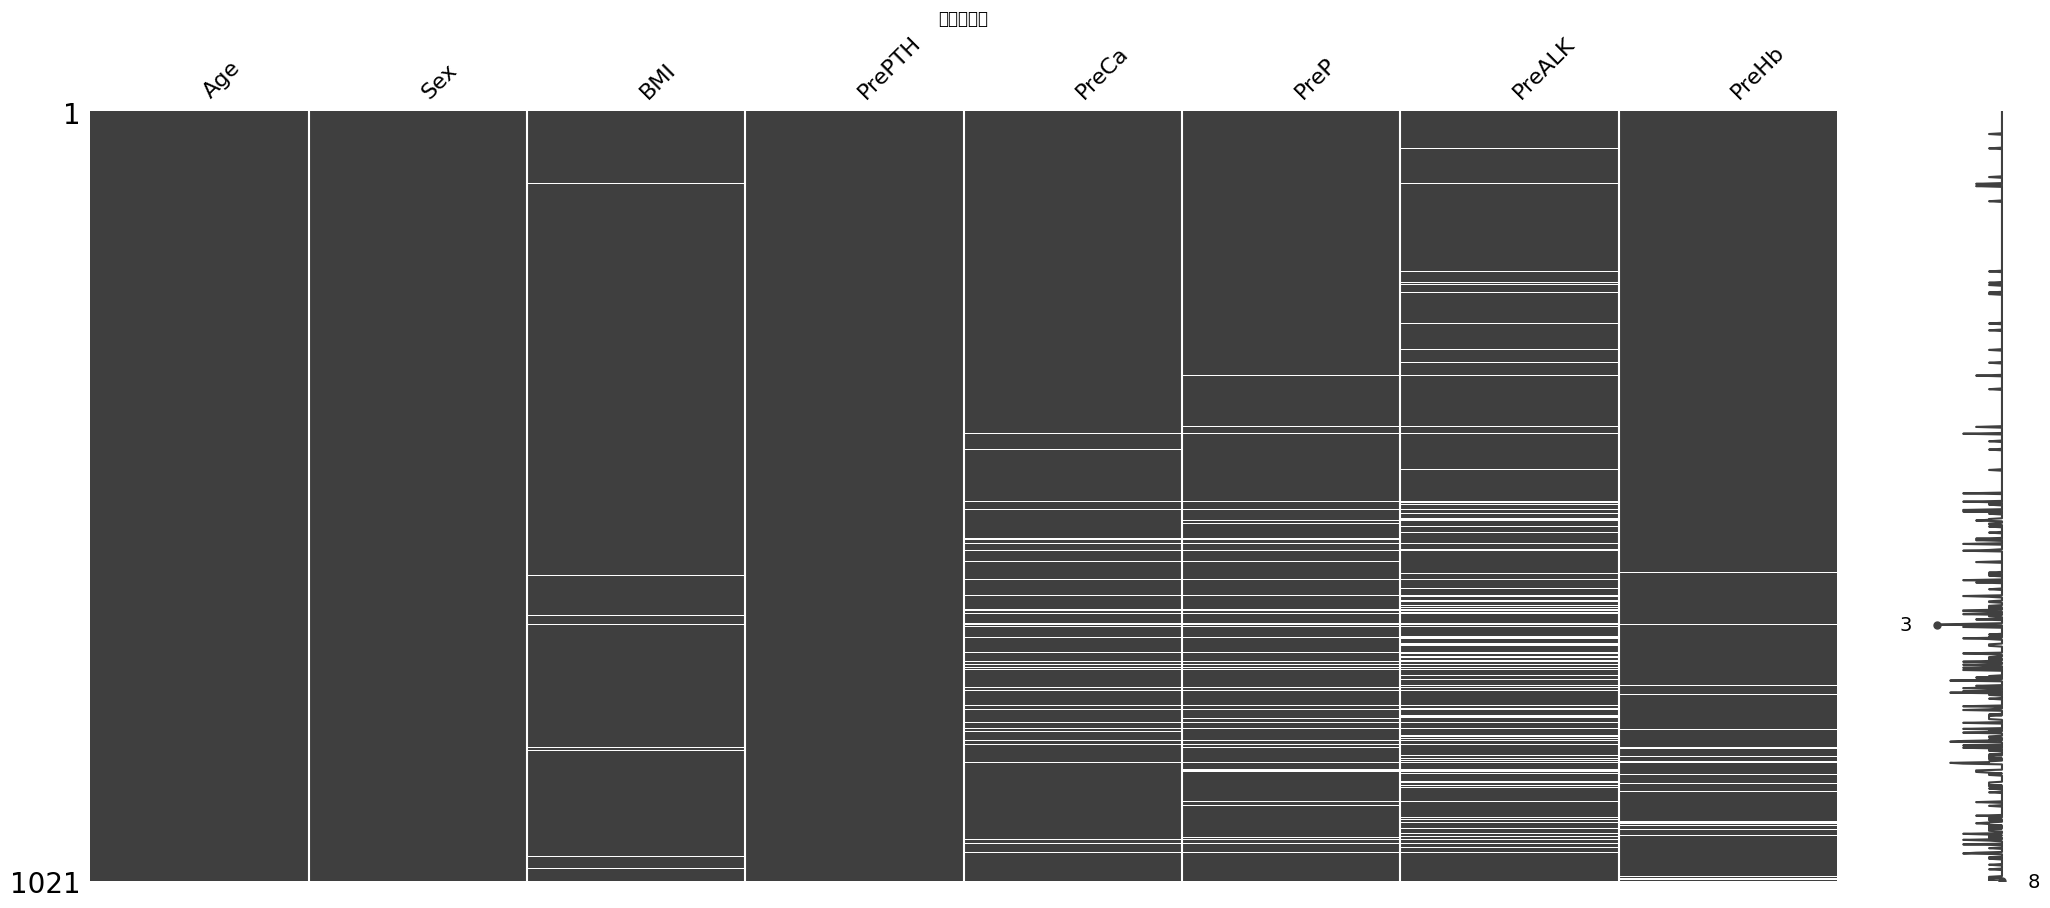

<Figure size 800x600 with 0 Axes>

C:\Users\longy\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32570 (\N{CJK UNIFIED IDEOGRAPH-7F3A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\longy\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\longy\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\longy\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20849 (\N{CJK UNIFIED IDEOGRAPH-5171}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\longy\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 296

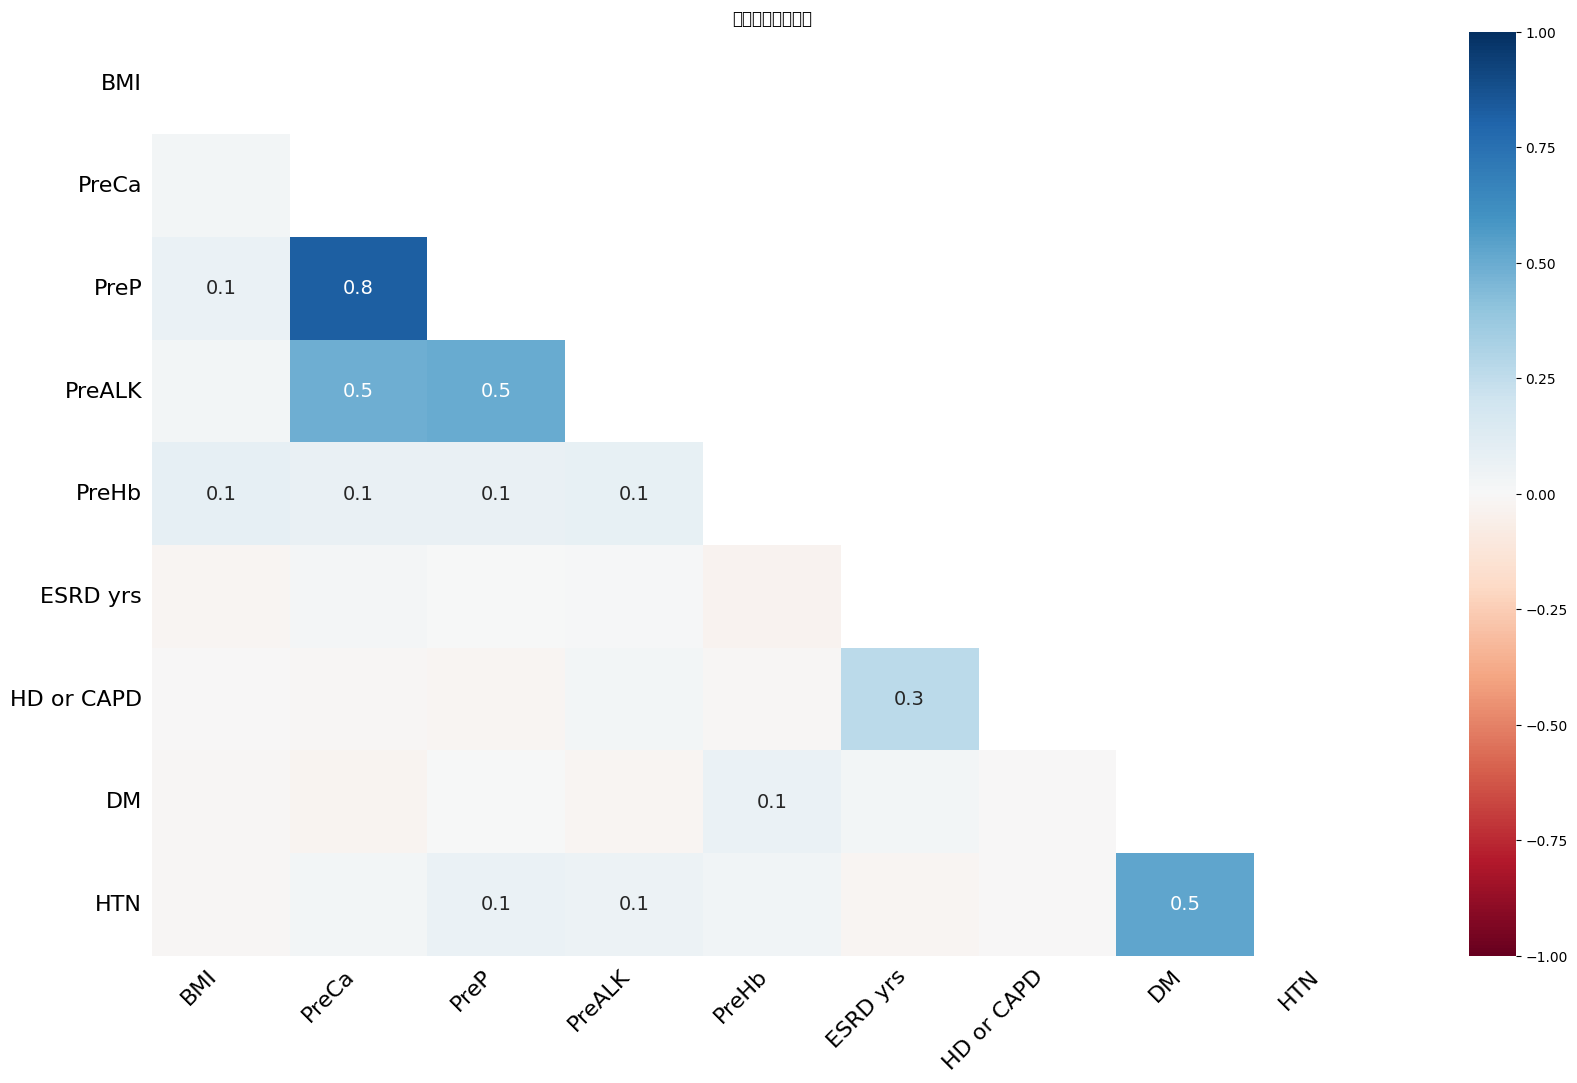

<Figure size 800x600 with 0 Axes>

C:\Users\longy\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32570 (\N{CJK UNIFIED IDEOGRAPH-7F3A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\longy\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\longy\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27169 (\N{CJK UNIFIED IDEOGRAPH-6A21}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\longy\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24335 (\N{CJK UNIFIED IDEOGRAPH-5F0F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\longy\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 326

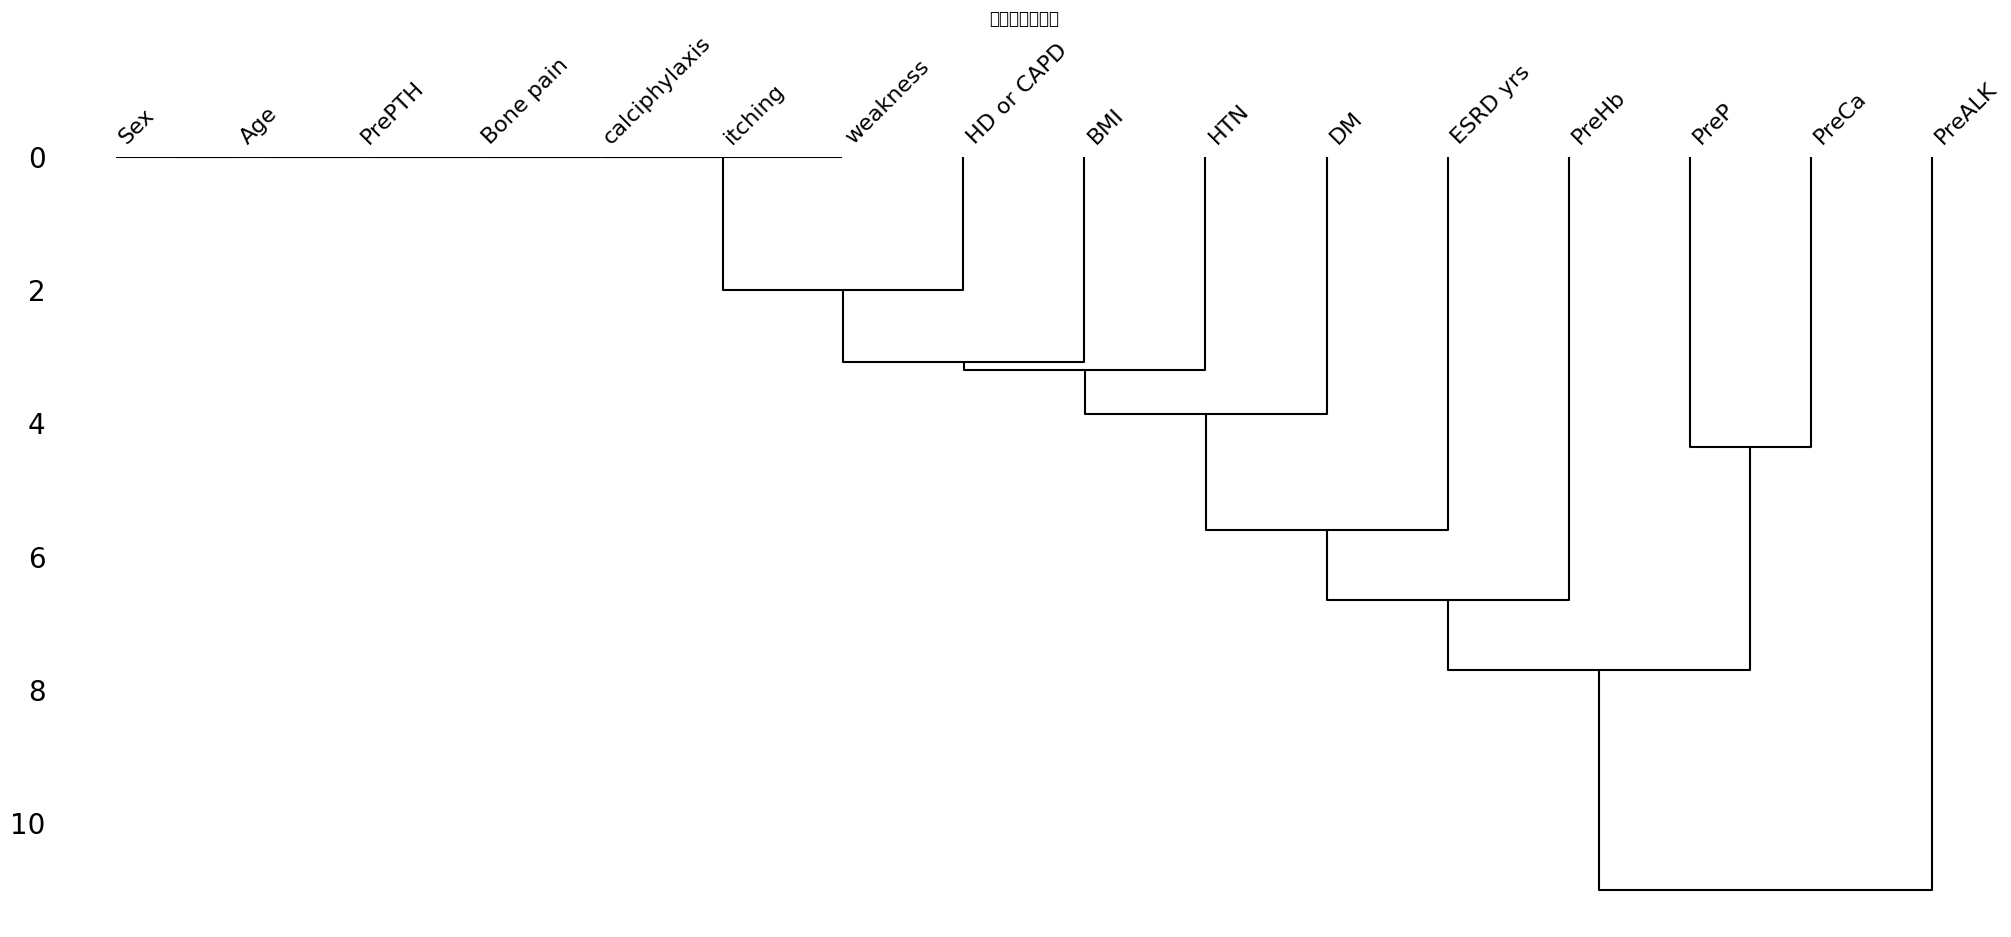

In [32]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
msno.matrix(raw_data[column_name])         # 缺失矩陣：每筆樣本與欄位的缺失狀況
plt.title('缺失值矩陣')
plt.show()

plt.figure(figsize=(8, 6))
msno.heatmap(raw_data[column_name+['ESRD yrs', 'HD or CAPD', 'Bone pain', 'calciphylaxis',  'itching' , 'DM', 'HTN', 'weakness']])        # 熱力圖：欄位之間缺失共現的相關性
plt.title('缺失值共現熱力圖')
plt.show()

# 6. （進階）群集缺失模式
plt.figure(figsize=(8, 6))
msno.dendrogram(raw_data[column_name+['ESRD yrs', 'HD or CAPD', 'Bone pain', 'calciphylaxis',  'itching' , 'DM', 'HTN', 'weakness']])     # 群集樹狀圖：將欄位依缺失相似度分群
plt.title('缺失模式群集圖')
plt.show()

In [33]:
def find_outliers_iqr(df, columns):
    outlier_dict = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_dict[col] = outliers
    return outlier_dict

outliers_iqr = find_outliers_iqr(raw_data, column_name + [target1, target2])

for col, outliers in outliers_iqr.items():
    print(f"{col}: {len(outliers)} extreme values")


Age: 11 extreme values
Sex: 0 extreme values
BMI: 18 extreme values
PrePTH: 61 extreme values
PreCa: 31 extreme values
PreP: 18 extreme values
PreALK: 83 extreme values
PreHb: 13 extreme values
Post1wPTH: 154 extreme values
Post1wCa: 17 extreme values


C:\Users\longy\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31665 (\N{CJK UNIFIED IDEOGRAPH-7BB1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\longy\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\longy\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22294 (\N{CJK UNIFIED IDEOGRAPH-5716}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


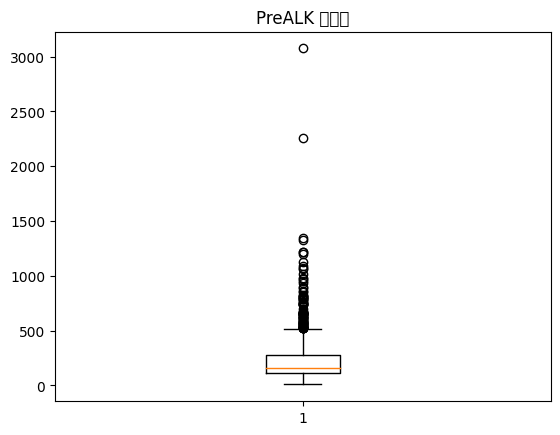

In [34]:
import matplotlib.pyplot as plt
plt.boxplot(raw_data['PreALK'].dropna())
plt.title('PreALK 箱型圖')
plt.show()

In [35]:
data = raw_data['PreALK'].dropna()
q1, med, q3 = np.percentile(data, [25, 50, 75])
mn, mx = data.min(), data.max()
print(f"min={mn:.2f}, Q1={q1:.2f}, med={med:.2f}, Q3={q3:.2f}, max={mx:.2f}")


min=8.00, Q1=110.50, med=161.00, Q3=273.00, max=3074.00


In [36]:
def check_kurtosis_skewness(df, columns):
    for col in columns:
        print(f"Column: {col}")
        print("Kurt: " ,df[col].kurt())
        print("skew: ",df[col].skew())
        data = df[col].dropna()
        log_data = np.log1p(data)
        print("Kurt after log1p: ", log_data.kurt())
        print("skew after log1p: ",log_data.skew())
        print("===" * 10)

In [37]:
check_kurtosis_skewness(raw_data, ['PrePTH', 'PreCa', 'PreP', 'PreALK', 'PreHb'])

Column: PrePTH
Kurt:  57.17903384797753
skew:  5.496069869147468
Kurt after log1p:  9.002387306331466
skew after log1p:  -1.466251063182828
Column: PreCa
Kurt:  10.573400532987026
skew:  0.5984110947370385
Kurt after log1p:  5.776148955945198
skew after log1p:  -0.5077252651963217
Column: PreP
Kurt:  159.45641327310483
skew:  8.259234971035449
Kurt after log1p:  4.5221516298301285
skew after log1p:  0.1683320115727867
Column: PreALK
Kurt:  35.92124886131457
skew:  4.37113631594754
Kurt after log1p:  0.8847187165380732
skew after log1p:  0.34918819411892255
Column: PreHb
Kurt:  1.2517296464094878
skew:  0.001008428102209855
Kurt after log1p:  13.247698113391039
skew after log1p:  -1.4637355253503037


In [38]:
log_cols = ['PreCa', 'PreP', 'PreALK']
raw_data = raw_data.copy()
for col in log_cols:
    raw_name = "log1p_" + col
    raw_data.loc[:, raw_name] = raw_data[col].apply(lambda x: np.log1p(x) if pd.notna(x) else np.nan)

In [39]:
lower = raw_data['log1p_PreALK'].quantile(0.01)
upper = raw_data['log1p_PreALK'].quantile(0.99)
    
    # winsorize（截斷）
raw_data.loc[:, 'log1p_PreALK'] = raw_data['log1p_PreALK'].clip(lower, upper)

C:\Users\longy\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31665 (\N{CJK UNIFIED IDEOGRAPH-7BB1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\longy\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\longy\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22294 (\N{CJK UNIFIED IDEOGRAPH-5716}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


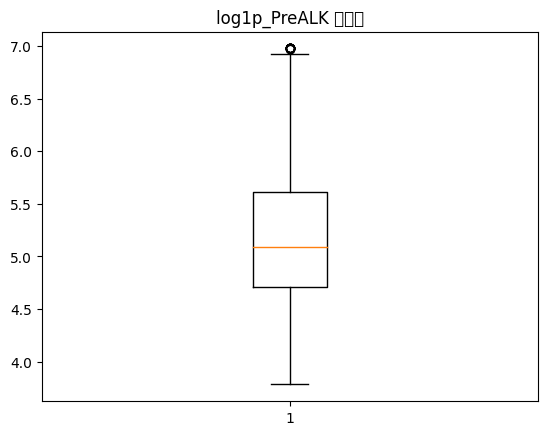

In [40]:
import matplotlib.pyplot as plt
plt.boxplot(raw_data['log1p_PreALK'].dropna())
plt.title('log1p_PreALK 箱型圖')
plt.show()

In [41]:
data = raw_data['log1p_PreALK'].dropna()
q1, med, q3 = np.percentile(data, [25, 50, 75])
mn, mx = data.min(), data.max()
print(f"min={mn:.2f}, Q1={q1:.2f}, med={med:.2f}, Q3={q3:.2f}, max={mx:.2f}")


min=3.78, Q1=4.71, med=5.09, Q3=5.61, max=6.98


In [42]:
mask = raw_data[column_name].notnull().all(axis=1)
complete_cases = raw_data[mask]

print(f"column_name的欄位皆沒有缺失值的資料數：{complete_cases.shape[0]}")

column_name的欄位皆沒有缺失值的資料數：848


In [43]:
complete_cases

,Chart No.,Others,autotransplant,Type,Re-op,PrePTH,Post1wPTH,Age,Sex,Ht,...,ParaRU size,Para RU Wt,ParaRL size,ParaRL Wt,operation_success,HBS,OP METHOD,log1p_PreCa,log1p_PreP,log1p_PreALK
0,9402555,".secondary hyperparathyroidism, post Total par...",1,2,0,910.0,293.00,69,2,158.7,...,0.4,0.070000,3.000000,5.010000,0.0,0.0,0,2.587764,1.916923,4.317488
1,6050929,".secondary hyperparathyroidism, post Total par...",1,2,0,1072.0,1.50,60,1,166.2,...,2.0,2.140000,1.600000,0.830000,1.0,1.0,0,2.388763,2.186051,4.574711
2,6872869,". Secondary hyperparathyoidism, s/p total para...",1,2,0,1600.0,10.50,69,2,154.8,...,2.5,2.180000,1.400000,0.390000,1.0,1.0,0,2.459589,1.360977,5.673323
3,60478606,"Right papillary thyoid carcinoma, s/p right t...",1,2,0,1023.0,7.31,42,1,160,...,1.0,0.210000,1.434106,0.773247,1.0,0.0,0,2.493205,1.526056,5.758902
4,60426530,. Hypocalcemia\n. Severe secondary hyperparath...,1,2,0,1726.0,45.10,42,2,151.4,...,1.5,0.360000,1.500000,0.570000,1.0,1.0,0,2.397895,2.549445,4.927254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068,6608344,secondary hyperparathyroidism,2,2,0,1532.0,11.50,65,2,155,...,1.7,1.190000,1.400000,0.830000,1.0,0.0,0,2.549445,1.960095,5.743003
1069,9313911,1.secondary hyperparathyroidism\n2.End stage r...,2,2,0,1144.0,147.00,56,2,151,...,0.4,0.040000,1.100000,0.240000,0.0,NaN,0,2.541602,1.808289,6.257668
1070,6254771,secondary hyperparathyroidism,3,2,1,403.0,348.00,46,2,158,...,1.8,0.400000,1.700000,0.600000,0.0,0.0,1,2.525729,1.902108,5.389072
1073,9411488,secondary hyperparathyroidism,2,2,1,428.0,718.00,40,1,182,...,1.9,1.600000,1.300000,0.300000,0.0,0.0,1,2.602690,2.041220,4.828314


In [44]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(
    complete_cases,
    test_size=0.3,       
    random_state=110191038,     
    shuffle=True         
)

print(f"訓練集筆數：{len(train_df)}")   
print(f"驗證集筆數：{len(val_df)}")     


訓練集筆數：593
驗證集筆數：255


In [45]:
raw_data.columns

Index(['Chart No.', 'Others', 'autotransplant', 'Type', 'Re-op', 'PrePTH',
       'Post1wPTH', 'Age', 'Sex', 'Ht', 'BW', 'BMI', 'ESRD yrs', 'HD or CAPD',
       'Bone pain', 'itching', 'weakness', 'calciphylaxis', 'DM', 'HTN',
       'PreCa', 'PreP', 'PreALK', 'PreHb', 'Post1wCa', 'OP method',
       'Thymectomy', 'thyroidectomy', 'OP time', 'blood loss', 'ParaLU size',
       'ParaLU Wt', 'Para LL size', 'ParaLL Wt', 'ParaRU size', 'Para RU Wt',
       'ParaRL size', 'ParaRL Wt', 'operation_success', 'HBS', 'OP METHOD',
       'log1p_PreCa', 'log1p_PreP', 'log1p_PreALK'],
      dtype='object')

In [51]:
import numpy as np
import pandas as pd
from sklearn.experimental import enable_iterative_imputer  # noqa: F401
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.base import clone
from joblib import dump, load
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge
from xgboost import XGBRegressor

pre_cols = ['log1p_PreCa', 'log1p_PreP', 'log1p_PreALK', 'PreHb']
other_cols = ['PrePTH', 'ESRD yrs', 'HD or CAPD', 'Bone pain', 'calciphylaxis', 'BMI', 'itching' , 'DM', 'HTN', 'Sex' , 'Age','weakness'] # 
all_feats = other_cols + pre_cols


val_masked = val_df.copy()
mask = np.random.rand(len(val_df), len(pre_cols)) < 0.5
for j, col in enumerate(pre_cols):
    val_masked.loc[mask[:, j], col] = np.nan

imputer_dict = {
    'Iterative': IterativeImputer(max_iter=30, initial_strategy='median', random_state=11019038),
    'KNN': KNNImputer(n_neighbors=3),
    'RF': IterativeImputer(
        estimator=RandomForestRegressor(n_estimators=50, random_state=11019038),
        max_iter=30, initial_strategy='median', random_state=11019038
    ),
    'Huber': IterativeImputer(
        estimator=HuberRegressor(max_iter=5000, tol=1e-2),
        max_iter=30, initial_strategy='median', random_state=11019038
    ),
    'SVR': IterativeImputer(
            estimator=SVR(kernel='linear', C=1.0, epsilon=0.1),
            max_iter=30, initial_strategy='median', random_state=11019038
    ),
    'PMM': IterativeImputer(
        estimator=BayesianRidge(),
        initial_strategy='median',
        max_iter=30,
        sample_posterior=True,
        random_state=11019038
    ),
    'XGB': IterativeImputer(
        estimator=XGBRegressor(
            n_estimators=100,
            learning_rate=0.1,
            random_state=11019038,
            verbosity=0
        ),
        max_iter=30,
        initial_strategy='median',
        random_state=11019038
    ),
}

results = []
for name, imputer in imputer_dict.items():
    imp = clone(imputer)
    scaler = StandardScaler()
    
    X_train = train_df[all_feats].copy()
    X_val   = val_masked[all_feats].copy()
    # multivariate fit & transform on pre_cols
    X_train_scaled = scaler.fit_transform(X_train)
    imp.fit(X_train_scaled)

    X_val_scaled  = scaler.transform(X_val)
    X_imp_scaled  = imp.transform(X_val_scaled)
    X_imp = scaler.inverse_transform(X_imp_scaled)
    imp_df        = pd.DataFrame(X_imp, columns=all_feats, index=val_masked.index)
    
    
    # calculate MAE/RMSE per column
    for col in pre_cols:
        mask_idx = val_masked[col].isnull()
        y_true = val_df.loc[mask_idx, col]
        y_pred = imp_df.loc[mask_idx, col]
        results.append({
            'method': name,
            'variable': col,
            'mae': mean_absolute_error(y_true, y_pred),
            'rmse': np.sqrt(mean_squared_error(y_true, y_pred))
        })
# summarize & select best_by_mae
res_df = pd.DataFrame(results)
summary = res_df.pivot_table(index='variable', columns='method', values=['mae','rmse'])
print(summary)
best_by_mae = summary['mae'].idxmin(axis=1).to_dict()
print('最佳 MAE 補值方法：', best_by_mae)

imputed_full = {}
trained_imputers = {}
for name, imputer in imputer_dict.items():
    imp = clone(imputer)
    scaler = StandardScaler()
    X_train = train_df[all_feats].copy()
        
    # fit on train
    X_train_scaled = scaler.fit_transform(X_train)
    imp.fit(X_train_scaled)
    trained_imputers[name] = (scaler, imp)
    # transform masked val
    X_val = val_masked[all_feats].copy()

    X_val_scaled  = scaler.transform(X_val)
    X_imp_scaled = imp.transform(X_val_scaled)
    X_imp = scaler.inverse_transform(X_imp_scaled)
    imp_df        = pd.DataFrame(X_imp, columns=all_feats, index=val_masked.index)

    imputed_full[name] = imp_df

imp_final = val_masked.copy()
for col, method in best_by_mae.items():
    imp_final[col] = val_masked[col].fillna(imputed_full[method][col])

final_results = []
for col in pre_cols:
    mask_idx = val_masked[col].isnull()
    y_true = val_df.loc[mask_idx, col]
    y_pred = imp_final.loc[mask_idx, col]
    final_results.append({
        'variable': col,
        'mae': mean_absolute_error(y_true, y_pred),
        'rmse': np.sqrt(mean_squared_error(y_true, y_pred)),
        'dataset std': y_true.std(),
        'rmse/std': np.sqrt(mean_squared_error(y_true, y_pred)) / y_true.std()
    })
final_res_df = pd.DataFrame(final_results)
print('\n=== 最終 imputation performance ===')
print(final_res_df)

artifacts = {
    'trained_imputers': trained_imputers,
    'best_by_mae': best_by_mae,
    'pre_cols': pre_cols,
    'other_cols': other_cols
}
#dump(artifacts, 'imputation_artifacts without prePTH.joblib')
#print('已儲存 imputation_artifacts without prePTH.joblib')

                   mae                                                    \
method           Huber Iterative       KNN       PMM        RF       SVR   
variable                                                                   
PreHb         1.230294  1.222721  1.589153  1.893745  1.277476  1.234377   
log1p_PreALK  0.505032  0.511189  0.554393  0.746973  0.489402  0.503675   
log1p_PreCa   0.061386  0.061339  0.074231  0.097060  0.065652  0.061028   
log1p_PreP    0.193325  0.192187  0.216718  0.273375  0.189212  0.194390   

                            rmse                                          \
method             XGB     Huber Iterative       KNN       PMM        RF   
variable                                                                   
PreHb         1.278843  1.630356  1.632124  2.004851  2.379520  1.682044   
log1p_PreALK  0.449865  0.662225  0.630974  0.697489  0.932761  0.623814   
log1p_PreCa   0.069110  0.092831  0.093202  0.106876  0.134017  0.096500   
log1p_PreP 

In [41]:
final_res_df

,variable,mae,rmse
0,log1p_PreCa,0.061718,0.090559
1,log1p_PreP,0.175072,0.228461
2,log1p_PreALK,0.477348,0.573748
3,PreHb,1.240947,1.633275


In [24]:
final_res_df

,variable,mae,rmse
0,log1p_PreCa,0.060078,0.078769
1,log1p_PreP,0.178679,0.235167
2,log1p_PreALK,0.452886,0.576510
3,PreHb,1.323213,1.757650


In [42]:
for i in range(len(final_res_df)-1):
    print(f"Variable: {final_res_df['variable'][i]}")
    print(f"MAE: {final_res_df['mae'][i]}")
    print(f"RMSE: {final_res_df['rmse'][i]}")
    print(f"約 {np.expm1(final_res_df['mae'][i])*100:.1f}% 平均相對誤差")
    print(f"約 {np.expm1(final_res_df['rmse'][i])*100:.1f}% RMSE 相對誤差")
    print("=" * 30)

Variable: log1p_PreCa
MAE: 0.061718439244621504
RMSE: 0.09055893881780756
約 6.4% 平均相對誤差
約 9.5% RMSE 相對誤差
Variable: log1p_PreP
MAE: 0.17507176725604637
RMSE: 0.22846138688380815
約 19.1% 平均相對誤差
約 25.7% RMSE 相對誤差
Variable: log1p_PreALK
MAE: 0.4773484538506301
RMSE: 0.5737479164129481
約 61.2% 平均相對誤差
約 77.5% RMSE 相對誤差


In [44]:
from joblib import dump, load
art = load('imputation_artifacts without prePTH.joblib')
trained_imputers = art['trained_imputers']
best_by_mae = art['best_by_mae']
pre_cols = art['pre_cols']
other_cols = art['other_cols']
all_feats = other_cols + pre_cols


raw_masked = raw_data.copy()

imp_raw = raw_masked[other_cols].copy()

for col, method in best_by_mae.items():
    scaler, imp = trained_imputers[method]
    X_scaled      = scaler.transform(raw_masked[all_feats])
    X_imp_scaled  = imp.transform(X_scaled)
    X_imp         = scaler.inverse_transform(X_imp_scaled)
    col_series = pd.Series(
        X_imp[:, pre_cols.index(col)],
        index=raw_masked.index
    )
    imp_raw[col] = raw_masked[col].fillna(col_series)

rest = raw_masked.drop(columns=other_cols+pre_cols)
raw_data_imputed = pd.concat([imp_raw, rest], axis=1)

missing_values = raw_data_imputed[['Age', 'Sex', 'BMI','PrePTH', 'log1p_PreCa', 'log1p_PreP', 'log1p_PreALK', 'PreHb']  + [target1, target2]].isnull().sum()
print(missing_values)


Age               0
Sex               0
BMI               9
PrePTH            0
log1p_PreCa       0
log1p_PreP        0
log1p_PreALK      0
PreHb             0
Post1wPTH        33
Post1wCa        135
dtype: int64


In [45]:
raw_data_imputed

,PrePTH,ESRD yrs,HD or CAPD,Bone pain,calciphylaxis,BMI,itching,DM,HTN,Sex,...,ParaLU Wt,Para LL size,ParaLL Wt,ParaRU size,Para RU Wt,ParaRL size,ParaRL Wt,operation_success,HBS,OP METHOD
0,910.0,15.0,1.0,1,0,23.700000,0,1.0,1.0,2,...,0.130000,1.2,0.510000,0.4,0.070000,3.000000,5.010000,0.0,0.0,0
1,1072.0,4.0,1.0,0,0,29.800000,0,1.0,0.0,1,...,0.310000,2.5,0.600000,2.0,2.140000,1.600000,0.830000,1.0,1.0,0
2,1600.0,7.0,1.0,1,0,23.110000,0,0.0,1.0,2,...,0.570000,0.6,0.190000,2.5,2.180000,1.400000,0.390000,1.0,1.0,0
3,1023.0,20.0,1.0,1,0,16.400000,1,0.0,0.0,1,...,1.350000,1.5,1.070000,1.0,0.210000,1.434106,0.773247,1.0,0.0,0
4,1726.0,3.0,2.0,0,0,18.600000,1,0.0,0.0,2,...,0.520000,1.1,0.200000,1.5,0.360000,1.500000,0.570000,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,428.0,3.0,1.0,1,0,20.528922,1,0.0,0.0,1,...,2.190000,1.2,0.320000,1.9,1.600000,1.300000,0.300000,0.0,0.0,1
1074,1355.0,11.0,1.0,0,0,23.555556,0,NaN,0.0,2,...,1.198126,2.0,0.956473,1.3,1.209979,1.800000,0.912142,1.0,NaN,0
1075,2546.0,7.0,1.0,1,0,18.807870,1,0.0,0.0,2,...,1.494729,1.0,1.360127,1.4,1.454569,0.500000,1.211156,1.0,1.0,1
1076,1034.0,7.0,1.0,1,0,18.918067,1,0.0,0.0,2,...,1.110995,0.5,0.824812,0.4,1.024370,0.500000,0.889249,0.0,NaN,0


In [47]:
raw_data_imputed.to_excel('type2補值資料final.xlsx', index=False)

In [48]:
import pandas as pd
import numpy as np

raw_data3=pd.read_excel('type2補值資料final.xlsx', header= 0)

In [49]:
column_name=['Age', 'Sex', 'BMI','PrePTH', 'log1p_PreCa', 'log1p_PreP', 'log1p_PreALK', 'PreHb'] 
target1= 'Post1wPTH' #手術後一周內iPTH回到正常值 (≤ 65ng/L)
target2= 'Post1wCa' # 手術後一周內Ca低於8.4mg/dL

missing_values = raw_data3[column_name + [target1, target2]].isnull().sum()
print(missing_values)

Age               0
Sex               0
BMI               9
PrePTH            0
log1p_PreCa       0
log1p_PreP        0
log1p_PreALK      0
PreHb             0
Post1wPTH        33
Post1wCa        135
dtype: int64


In [51]:
def find_outliers_iqr(df, columns):
    outlier_dict = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_dict[col] = outliers
    return outlier_dict

outliers_iqr = find_outliers_iqr(raw_data3, column_name + [target1, target2])

for col, outliers in outliers_iqr.items():
    print(f"{col}: {len(outliers)} extreme values")


Age: 11 extreme values
Sex: 0 extreme values
BMI: 18 extreme values
PrePTH: 61 extreme values
log1p_PreCa: 74 extreme values
log1p_PreP: 71 extreme values
log1p_PreALK: 121 extreme values
PreHb: 54 extreme values
Post1wPTH: 154 extreme values
Post1wCa: 17 extreme values


In [54]:
raw_data3['OP method'].value_counts()

OP method
1    893
2     71
3     32
4     24
0      1
Name: count, dtype: int64

In [55]:
raw_data3['OP METHOD'].value_counts()

OP METHOD
0     962
1      58
20      1
Name: count, dtype: int64

In [56]:
raw_data3 = raw_data3[raw_data3['OP method']!=4]

In [57]:
len(raw_data3)

997

In [58]:
raw_data3['Re-op'].value_counts()

Re-op
0     958
1      38
20      1
Name: count, dtype: int64

In [63]:
raw_data3=raw_data3[raw_data3['Re-op'] != 1]

In [65]:
raw_data3

,PrePTH,ESRD yrs,HD or CAPD,Bone pain,calciphylaxis,BMI,itching,DM,HTN,Sex,...,ParaLU Wt,Para LL size,ParaLL Wt,ParaRU size,Para RU Wt,ParaRL size,ParaRL Wt,operation_success,HBS,OP METHOD
0,910.0,15.0,1.0,1,0,23.700000,0,1.0,1.0,2,...,0.130000,1.2,0.510000,0.4,0.070000,3.000000,5.010000,0.0,0.0,0
1,1072.0,4.0,1.0,0,0,29.800000,0,1.0,0.0,1,...,0.310000,2.5,0.600000,2.0,2.140000,1.600000,0.830000,1.0,1.0,0
2,1600.0,7.0,1.0,1,0,23.110000,0,0.0,1.0,2,...,0.570000,0.6,0.190000,2.5,2.180000,1.400000,0.390000,1.0,1.0,0
3,1023.0,20.0,1.0,1,0,16.400000,1,0.0,0.0,1,...,1.350000,1.5,1.070000,1.0,0.210000,1.434106,0.773247,1.0,0.0,0
4,1726.0,3.0,2.0,0,0,18.600000,1,0.0,0.0,2,...,0.520000,1.1,0.200000,1.5,0.360000,1.500000,0.570000,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012,1144.0,1.0,2.0,1,0,22.367440,0,0.0,0.0,2,...,0.130000,3.0,8.780000,0.4,0.040000,1.100000,0.240000,0.0,NaN,0
1014,946.0,2.0,1.0,0,0,24.940095,0,0.0,0.0,2,...,0.680000,1.1,0.230000,2.3,2.940000,2.600000,1.150000,1.0,0.0,0
1015,2562.0,10.0,1.0,0,0,20.395421,0,0.0,0.0,2,...,0.100000,1.1,0.190000,4.5,7.260000,0.400000,0.060000,0.0,1.0,0
1017,1355.0,11.0,1.0,0,0,23.555556,0,NaN,0.0,2,...,1.198126,2.0,0.956473,1.3,1.209979,1.800000,0.912142,1.0,NaN,0


In [ ]:
raw_data3['autotransplant'].value_counts()

autotransplant
2      569
1      283
0      101
4        4
胸骨       1
左胸骨      1
Name: count, dtype: int64

In [71]:
raw_data3=raw_data3[~raw_data3['autotransplant'].isin(['胸骨', '左胸骨'])]

In [73]:
raw_data3=raw_data3[raw_data3['autotransplant'] != 4]

In [74]:
raw_data3['autotransplant'].value_counts()

autotransplant
2    569
1    283
0    101
Name: count, dtype: int64

OP method重新編碼

1=total parathyroidectomy + autotransplantation 100gm   1+1  o+a

2=total parathyroidectomy + autotransplantation 140gm   1+2

3=total parathyroidectomy without autotransplantation   2+X

4= 3 and half parathyroidectomy 3+1/2                   3+X

In [76]:
raw_data3['autotransplant'] = raw_data3['autotransplant'].astype(int)

In [75]:
raw_data3.columns

Index(['PrePTH', 'ESRD yrs', 'HD or CAPD', 'Bone pain', 'calciphylaxis', 'BMI',
       'itching', 'DM', 'HTN', 'Sex', 'Age', 'weakness', 'PreHb',
       'log1p_PreALK', 'log1p_PreCa', 'log1p_PreP', 'Chart No.', 'Others',
       'autotransplant', 'Type', 'Re-op', 'Post1wPTH', 'Ht', 'BW', 'PreCa',
       'PreP', 'PreALK', 'Post1wCa', 'OP method', 'Thymectomy',
       'thyroidectomy', 'OP time', 'blood loss', 'ParaLU size', 'ParaLU Wt',
       'Para LL size', 'ParaLL Wt', 'ParaRU size', 'Para RU Wt', 'ParaRL size',
       'ParaRL Wt', 'operation_success', 'HBS', 'OP METHOD'],
      dtype='object')

In [79]:
def map_new_op_method(row):
    op = row['OP method']
    auto = row['autotransplant']
    
    if op == 1 and auto == 1:
        return 1
    elif op == 1 and auto == 2:
        return 2
    elif (op == 1 and auto == 0) or op == 2:
        return 3
    elif op == 3:
        return 4
    else:
        return None

In [80]:
raw_data3['OP method'] = raw_data3.apply(map_new_op_method, axis=1)

In [78]:
raw_data3[(raw_data3['OP method'] == 1) & (raw_data3['autotransplant'] == 0)]

,PrePTH,ESRD yrs,HD or CAPD,Bone pain,calciphylaxis,BMI,itching,DM,HTN,Sex,...,ParaLU Wt,Para LL size,ParaLL Wt,ParaRU size,Para RU Wt,ParaRL size,ParaRL Wt,operation_success,HBS,OP METHOD
73,1653.0,10.0,3.0,0,1,19.514133,1,0.0,0.0,1,...,0.290000,0.800000,0.100000,0.500000,0.070000,1.372778,0.883019,0.0,0.0,0
134,1107.0,10.0,3.0,0,1,16.242852,0,0.0,1.0,1,...,1.234191,1.000000,0.070000,0.500000,1.222383,2.000000,0.922883,0.0,1.0,0
164,826.0,16.0,1.0,1,0,26.927438,1,1.0,1.0,2,...,0.310000,1.200000,0.670000,0.700000,0.200000,1.400000,0.750000,1.0,0.0,0
402,171.0,NaN,NaN,0,0,28.068944,0,0.0,0.0,2,...,0.540000,1.700000,1.730000,0.400000,0.900000,1.200000,0.310000,1.0,0.0,0
432,901.8,12.0,1.0,0,0,25.449955,0,0.0,0.0,2,...,0.240000,1.300000,0.390000,2.000000,2.640000,1.000000,0.500000,1.0,0.0,0
439,164.0,0.0,0.0,0,0,16.549584,0,0.0,1.0,2,...,1.029856,1.435313,0.670160,1.550703,0.810303,1.500000,0.700000,1.0,0.0,0
465,3829.0,15.0,1.0,1,0,18.666667,1,0.0,0.0,2,...,2.090000,1.200000,0.760000,3.300000,4.120000,1.600000,0.580000,1.0,0.0,0
488,1149.0,4.0,1.0,0,0,28.312926,0,1.0,1.0,2,...,0.710000,1.100000,0.250000,2.500000,0.620000,1.200000,0.330000,1.0,1.0,0
602,98.2,0.0,0.0,0,0,28.720083,0,1.0,1.0,2,...,0.370000,1.499618,0.869736,1.598290,0.977846,1.661111,1.075341,1.0,0.0,0


In [84]:
raw_data3['OP method'].value_counts()

OP method
2.0    564
1.0    282
3.0     76
4.0     30
Name: count, dtype: int64

In [85]:
raw_data3 = raw_data3.drop(columns=['autotransplant'])

In [86]:
raw_data3

,PrePTH,ESRD yrs,HD or CAPD,Bone pain,calciphylaxis,BMI,itching,DM,HTN,Sex,...,ParaLU Wt,Para LL size,ParaLL Wt,ParaRU size,Para RU Wt,ParaRL size,ParaRL Wt,operation_success,HBS,OP METHOD
0,910.0,15.0,1.0,1,0,23.700000,0,1.0,1.0,2,...,0.130000,1.2,0.510000,0.4,0.070000,3.000000,5.010000,0.0,0.0,0
1,1072.0,4.0,1.0,0,0,29.800000,0,1.0,0.0,1,...,0.310000,2.5,0.600000,2.0,2.140000,1.600000,0.830000,1.0,1.0,0
2,1600.0,7.0,1.0,1,0,23.110000,0,0.0,1.0,2,...,0.570000,0.6,0.190000,2.5,2.180000,1.400000,0.390000,1.0,1.0,0
3,1023.0,20.0,1.0,1,0,16.400000,1,0.0,0.0,1,...,1.350000,1.5,1.070000,1.0,0.210000,1.434106,0.773247,1.0,0.0,0
4,1726.0,3.0,2.0,0,0,18.600000,1,0.0,0.0,2,...,0.520000,1.1,0.200000,1.5,0.360000,1.500000,0.570000,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012,1144.0,1.0,2.0,1,0,22.367440,0,0.0,0.0,2,...,0.130000,3.0,8.780000,0.4,0.040000,1.100000,0.240000,0.0,NaN,0
1014,946.0,2.0,1.0,0,0,24.940095,0,0.0,0.0,2,...,0.680000,1.1,0.230000,2.3,2.940000,2.600000,1.150000,1.0,0.0,0
1015,2562.0,10.0,1.0,0,0,20.395421,0,0.0,0.0,2,...,0.100000,1.1,0.190000,4.5,7.260000,0.400000,0.060000,0.0,1.0,0
1017,1355.0,11.0,1.0,0,0,23.555556,0,NaN,0.0,2,...,1.198126,2.0,0.956473,1.3,1.209979,1.800000,0.912142,1.0,NaN,0


In [87]:
raw_data3['OP method'].value_counts()

OP method
2.0    564
1.0    282
3.0     76
4.0     30
Name: count, dtype: int64

In [88]:
raw_data3.columns

Index(['PrePTH', 'ESRD yrs', 'HD or CAPD', 'Bone pain', 'calciphylaxis', 'BMI',
       'itching', 'DM', 'HTN', 'Sex', 'Age', 'weakness', 'PreHb',
       'log1p_PreALK', 'log1p_PreCa', 'log1p_PreP', 'Chart No.', 'Others',
       'Type', 'Re-op', 'Post1wPTH', 'Ht', 'BW', 'PreCa', 'PreP', 'PreALK',
       'Post1wCa', 'OP method', 'Thymectomy', 'thyroidectomy', 'OP time',
       'blood loss', 'ParaLU size', 'ParaLU Wt', 'Para LL size', 'ParaLL Wt',
       'ParaRU size', 'Para RU Wt', 'ParaRL size', 'ParaRL Wt',
       'operation_success', 'HBS', 'OP METHOD'],
      dtype='object')

In [89]:
size_cols = ['ParaLU size', 'Para LL size', 'ParaRU size', 'ParaRL size']
weight_cols = ['ParaLU Wt', 'ParaLL Wt', 'Para RU Wt', 'ParaRL Wt']

In [90]:
raw_data3['total_size'] = raw_data3[size_cols].sum(axis=1)
raw_data3['total_weight'] = raw_data3[weight_cols].sum(axis=1)

In [91]:
raw_data3 = raw_data3.drop(columns=['PreCa', 'PreP', 'PreALK'])

In [94]:
raw_data3.to_excel('補值資料final0522.xlsx', index=False)